In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

In [ ]:
data=pd.read_csv("/content/archive (17).zip")

In [ ]:
data

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,B-26370,8825,3594,15,Furniture,Tables,Debit Card,2024-07-31,Megan Mclean,New York,New York City,2024-07
1190,B-26298,2082,642,8,Electronics,Phones,EMI,2020-06-02,Caitlin Hunt,New York,Rochester,2020-06
1191,B-26298,2082,642,8,Electronics,Phones,EMI,2022-12-15,Jenna Holland,Texas,Austin,2022-12
1192,B-26298,2082,642,8,Electronics,Phones,EMI,2020-08-07,Stephanie Oconnell,New York,Buffalo,2020-08


In [ ]:
data.describe()

,Amount,Profit,Quantity
count,1194.000000,1194.000000,1194.000000
mean,5178.089615,1348.992462,10.674204
std,2804.921955,1117.992573,5.777102
min,508.000000,50.000000,1.000000
25%,2799.000000,410.000000,6.000000
50%,5152.000000,1014.000000,11.000000
75%,7626.000000,2035.000000,16.000000
max,9992.000000,4930.000000,20.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [ ]:
data.isna().sum()

,0
Order ID,0
Amount,0
Profit,0
Quantity,0
Category,0
Sub-Category,0
PaymentMode,0
Order Date,0
CustomerName,0
State,0


In [ ]:
#to finds the duplicates in our data
data.duplicated().sum()

np.int64(0)

EDA INCLUDING VISUALIZATION.

Visualizing monthly profit helps us understand sales trends across the year.
Are there peaks during certain months (like festivals or holidays)


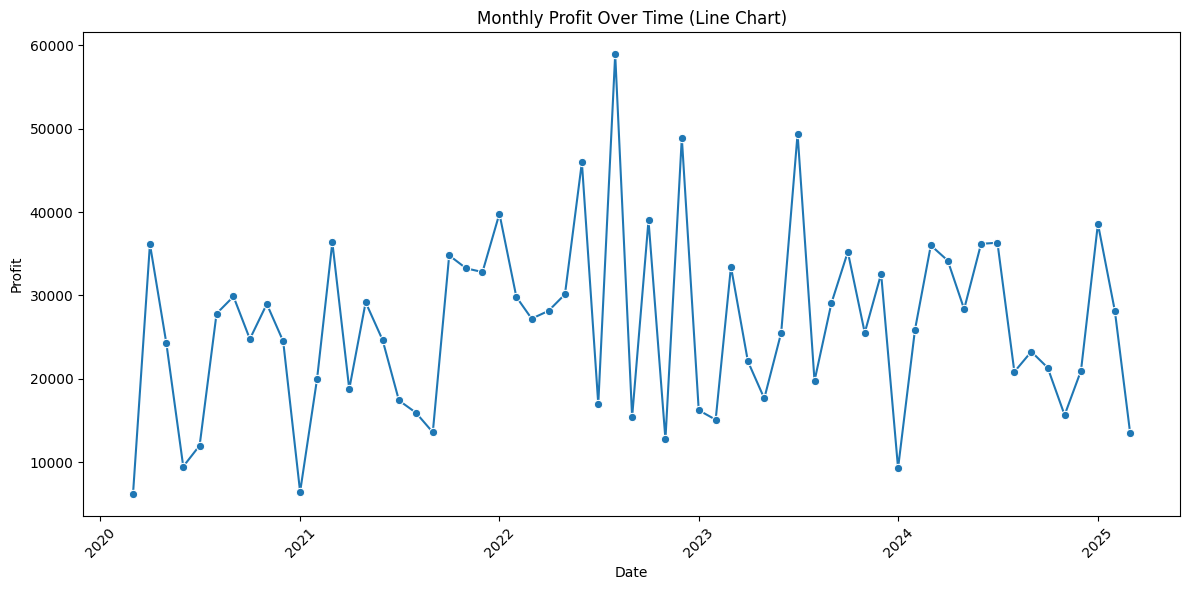

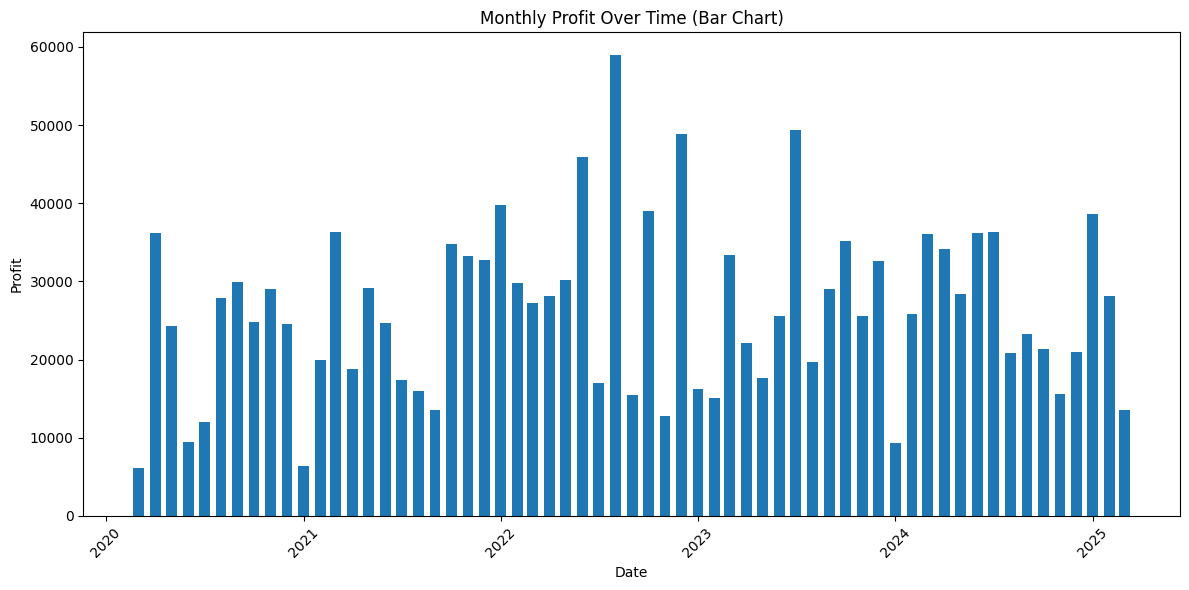

In [ ]:
#visualizing monthly profit in line chart and bar chart

data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

# Group by Year-Month and sum the profit
monthly_profit = data.groupby('Year-Month')['Profit'].sum().reset_index()

# Convert 'Year-Month' to datetime for plotting
monthly_profit['Year-Month'] = pd.to_datetime(monthly_profit['Year-Month'])

# Sort by date
monthly_profit = monthly_profit.sort_values(by='Year-Month')

# Plotting line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_profit, x='Year-Month', y='Profit', marker='o')
plt.title('Monthly Profit Over Time (Line Chart)')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_profit['Year-Month'], monthly_profit['Profit'], width=20)
plt.title('Monthly Profit Over Time (Bar Chart)')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The charts illustrate the monthly profit trend over time, revealing an overall increase in profit despite seasonal fluctuations, with a significant peak observed around late 2022 or early 2023.

PLOT 2

Now well try to visualize the overall sales over all the product categories and infer about what product category is best selling.

In [ ]:
#Now well try to visualize the overall sales over all the product categories and infer about what product category is best selling.


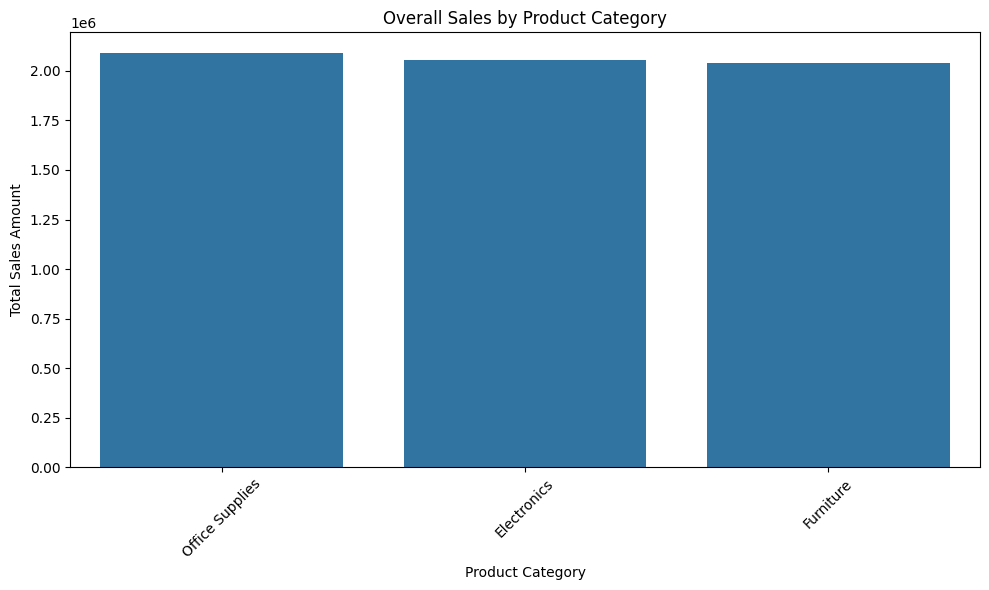

In [ ]:
# Group by Category and sum the Amount
category_sales = data.groupby('Category')['Amount'].sum().reset_index()

# Sort by sales amount
category_sales = category_sales.sort_values(by='Amount', ascending=False)

# Plotting bar chart of sales by category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Category', y='Amount')
plt.title('Overall Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Group by Category and sum the Profit
category_profit = data.groupby('Category')['Profit'].sum().reset_index()

# Sort by profit amount
category_profit = category_profit.sort_values(by='Profit', ascending=False)

# Display the sorted data
display(category_profit)

,Category,Profit
2,Office Supplies,551575
1,Furniture,540542
0,Electronics,518580


What if we want to visualize the top 5 customers by total spending?


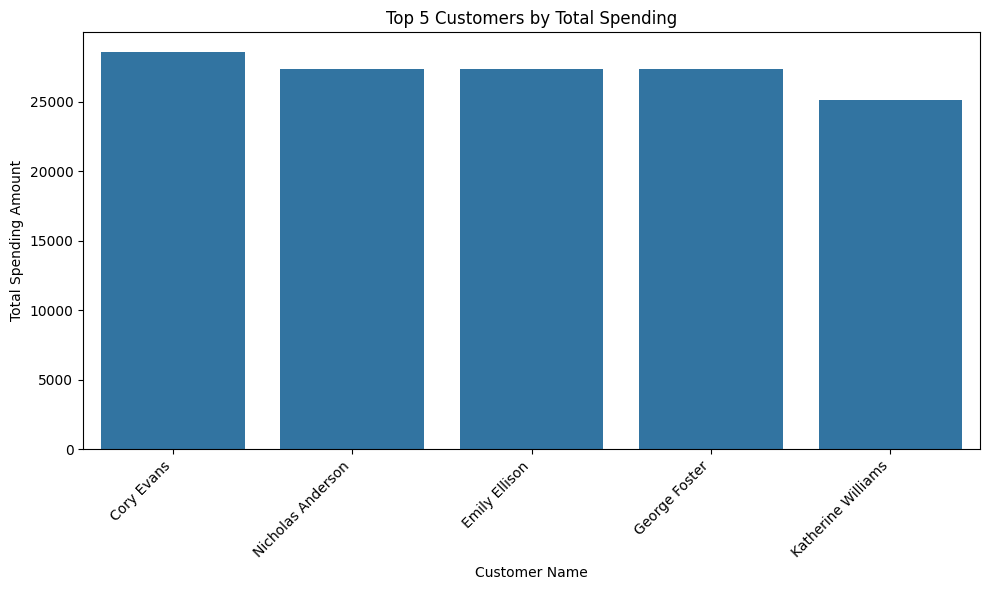

In [ ]:
# Group by CustomerName and sum the Amount
customer_spending = data.groupby('CustomerName')['Amount'].sum().reset_index()

# Sort by spending amount and get the top 5
top_5_customers = customer_spending.sort_values(by='Amount', ascending=False).head(5)

# Plotting bar chart of top 5 customers by spending
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_customers, x='CustomerName', y='Amount')
plt.title('Top 5 Customers by Total Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Calculate the average order value (AOV) per customer and plot them with a suitable diagram. Which customers have unusually high AOVs?

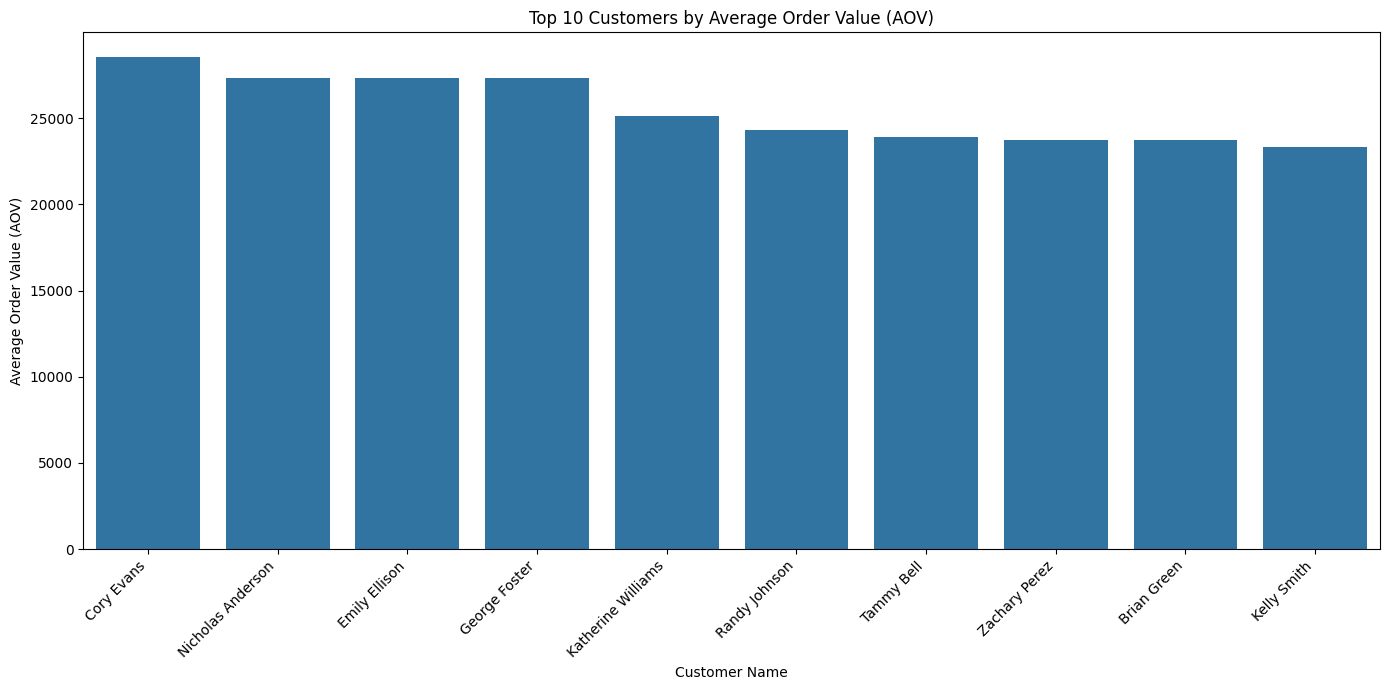

Customers with unusually high AOVs:


,CustomerName,Amount,Order Count,AOV
163,Cory Evans,28557,1,28557.0
584,Nicholas Anderson,27352,1,27352.0
234,Emily Ellison,27352,1,27352.0
256,George Foster,27352,1,27352.0
400,Katherine Williams,25121,1,25121.0
617,Randy Johnson,24295,1,24295.0
739,Tammy Bell,23895,1,23895.0
800,Zachary Perez,23737,1,23737.0
96,Brian Green,23737,1,23737.0
416,Kelly Smith,23333,1,23333.0


In [ ]:
# Calculate the number of orders per customer
customer_order_count = data.groupby('CustomerName')['Order ID'].nunique().reset_index()
customer_order_count.rename(columns={'Order ID': 'Order Count'}, inplace=True)

# Calculate total spending per customer (using the customer_spending DataFrame from previous step)
# customer_spending = data.groupby('CustomerName')['Amount'].sum().reset_index() # Assuming this is already done

# Merge total spending and order count
customer_aov = pd.merge(customer_spending, customer_order_count, on='CustomerName')

# Calculate AOV
customer_aov['AOV'] = customer_aov['Amount'] / customer_aov['Order Count']

# Sort by AOV
customer_aov = customer_aov.sort_values(by='AOV', ascending=False)

# Plotting AOV per customer (using a bar plot for better readability of customer names)
plt.figure(figsize=(14, 7))
sns.barplot(data=customer_aov.head(10), x='CustomerName', y='AOV') # Plotting top 10 for better visualization
plt.title('Top 10 Customers by Average Order Value (AOV)')
plt.xlabel('Customer Name')
plt.ylabel('Average Order Value (AOV)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display customers with unusually high AOVs (e.g., top 5 or 10)
print("Customers with unusually high AOVs:")
display(customer_aov.head(10))

PLOT 3

After inspecting the contribution of each categories towards the total revenue we can say which category has contributed how much but it's necessary to get a relative quantification to compare between the categories' contribution.

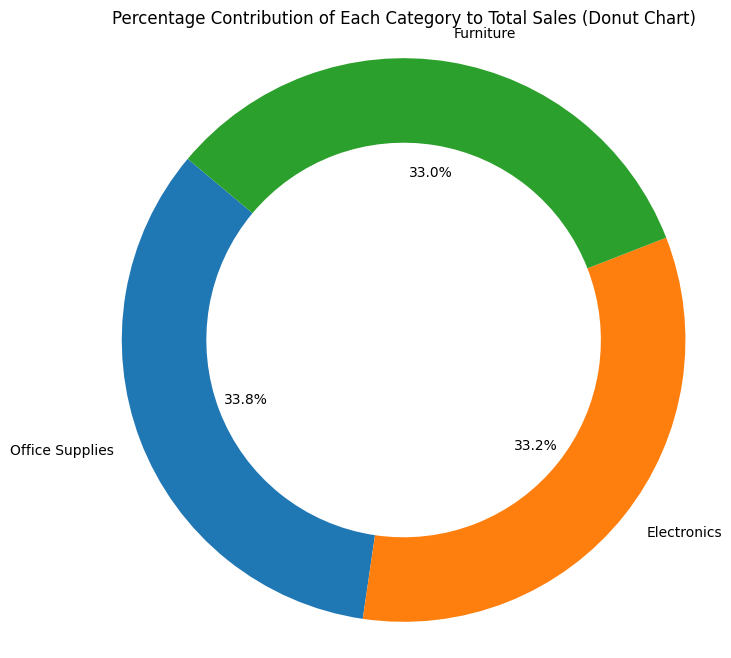

In [ ]:
# Calculate the total sales
total_sales = category_sales['Amount'].sum()

# Calculate the percentage contribution of each category
category_sales['Percentage'] = (category_sales['Amount'] / total_sales) * 100

# Plotting a donut chart of sales by category
plt.figure(figsize=(8, 8))
plt.pie(category_sales['Percentage'], labels=category_sales['Category'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Percentage Contribution of Each Category to Total Sales (Donut Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

PLOT 4

Plot a cumulative revenue line chart.

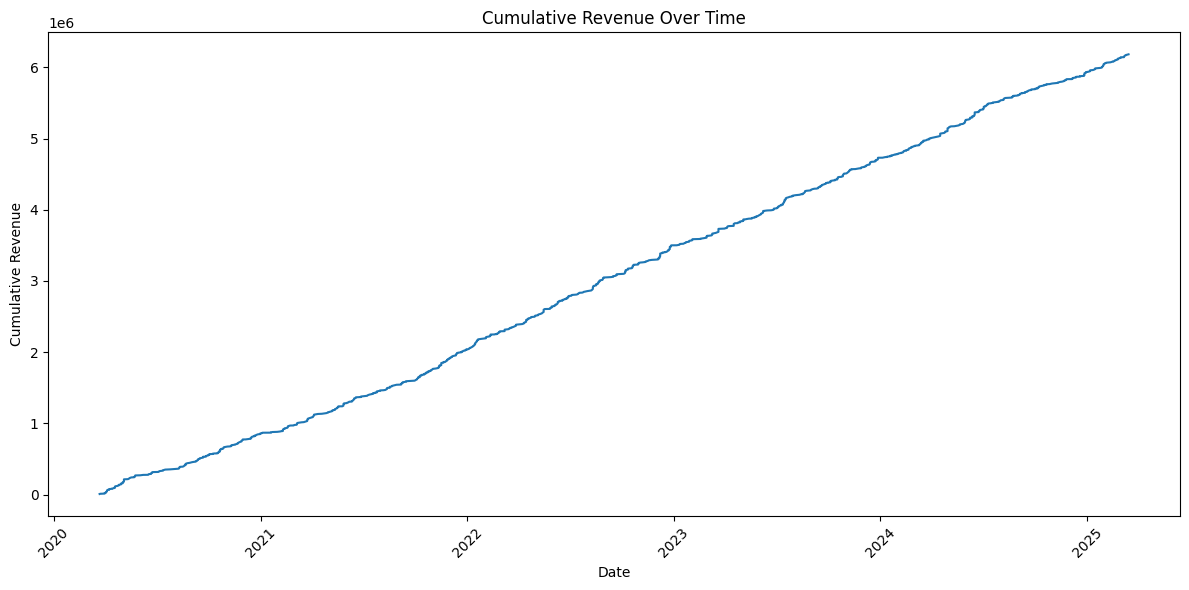

In [ ]:
# Ensure 'Order Date' is in datetime format and sort by date
data['Order Date'] = pd.to_datetime(data['Order Date'])
data = data.sort_values(by='Order Date')

# Calculate cumulative revenue
data['Cumulative Revenue'] = data['Amount'].cumsum()

# Plotting cumulative revenue line chart
plt.figure(figsize=(12, 6))
plt.plot(data['Order Date'], data['Cumulative Revenue']) # Added marker='o'
plt.title('Cumulative Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()